In [1]:
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%config IPCompleter.greedy=True
import joblib

In [2]:
samples = joblib.load('samples.sav')
list_CpGs = joblib.load('list_CpGs.sav')
list_patterns = joblib.load('list_patterns.sav')
# list_each_cpg = joblib.load('list_each_cpg.sav')
# CpG_positions = joblib.load('CpG_positions.sav')
CpG_num = joblib.load('CpG_num.sav')
colors = joblib.load('colors.sav')
CpG_targets = joblib.load('CpG_targets.sav')

In [3]:
set(samples["Group ID"])

{'CD', 'CL', 'Ctrl', 'DD', 'FD', 'MN', 'MP', 'MU', 'TR'}

In [5]:
sel_group = ['Ctrl', 'FD', 'MN', 'MP']
samples2 = samples.loc[samples["Group ID"].isin(sel_group),]
list_CpGs2 = {}
list_patterns2 = {}
for target in CpG_targets:
    list_CpGs2[target] = list_CpGs[target].loc[list_CpGs[target]["group"].isin(sel_group),]
    list_patterns2[target] = list_patterns[target].loc[list_patterns[target]["group"].isin(sel_group),]

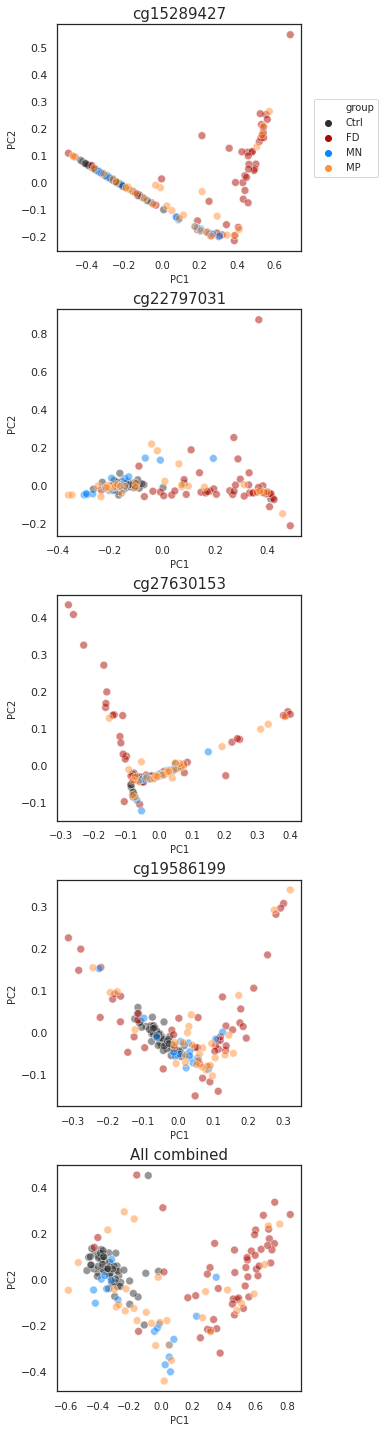

In [15]:
def pca_2d(table, colors, ax, title):
    pca = PCA(n_components=2)
    pca.fit(table)
    x_pca = pd.DataFrame(pca.transform(table), columns=["PC1","PC2"])
#     print(table.index)
    x_pca["group"] = [x.split("_")[0] for x in table.index]
    sns.scatterplot(x="PC1", y="PC2", hue="group", data=x_pca, alpha=0.5,
                    palette=colors, ax=ax, s=60)
    ax.set_title(title)
    ax.get_legend().remove()
    
fig, axs = plt.subplots(5, figsize=(5.5, 20))

# fig, axs = plt.subplots(len(CpG_targets), 2, figsize=(8, 25), sharex=False)
sns.set(rc={"font.size":10,
            "axes.titlesize":15,
            "axes.labelsize":10,
            'legend.fontsize': 10,
            "legend.title_fontsize": 10,
            'xtick.labelsize': 10}, style="white")
combined_X = []
combined_Y = []

for i, target in enumerate(CpG_targets):
    t = list_patterns2[target]
#     print("\t".join([target, str(t.shape)]))
#     print(t.head())
    tt = t.pivot(index='id', columns='pattern', values='proportion').fillna(0)
#     print("\t".join([target, str(tt.shape)]))
#     print(tt)
    
#     X = t.drop(columns=["group", "id", "pattern"]).values
#     print(X)
#     y = t["group"].values
#     print(len(y))
#     sys.exit()
#     print(pd.DataFrame(data=X, index=y, columns=[target + "_"+str(k) for k in range(len(X[0]))]).head())
    combined_X.append(tt)
#     print(X.shape)
    # 2D PCA
    pca_2d(table=tt, colors=colors, ax=axs[i], title=target)

    if i == 0:
        axs[i].legend(bbox_to_anchor=(1.05, 0.5), loc=6, borderaxespad=0.)
#     else:
#         axs[i].get_legend().remove()
        
result = pd.concat(combined_X, axis=1)
# print(result.shape)
# print("\t".join(["Combined", str(result.shape)]))
# print(result.head())
pca_2d(table=result, colors=colors, ax=axs[4], title="All combined")
# axs[0][0].legend(bbox_to_anchor=(1.01, 0.5), ncol=1, loc=6)

plt.tight_layout(h_pad=0.7)
plt.savefig('Fig5_PCA_pattern.pdf')
plt.savefig('Fig5_PCA_pattern.png', dpi=600)